In [4]:
pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26786 sha256=ad4920161425fb9ce9d83742cc67ec86537d052c459cc2d8218c898ec3c1447c
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import pandasql as ps

# Load data (no concatenation or merging)
df_transactions1 = pd.read_csv('Transactional_data_retail_01.csv')
df_transactions2 = pd.read_csv('Transactional_data_retail_02.csv')
df_customers = pd.read_csv('CustomerDemographics.csv')
df_products = pd.read_csv('ProductInfo.csv')

# Inspect the data to understand structure
print(df_transactions1.head())
print(df_transactions2.head())
print(df_customers.head())
print(df_products.head())

  Invoice StockCode  Quantity  Price  Customer ID       InvoiceDate
0  489434     85048        12   6.95      13085.0  01 December 2021
1  489434    79323P        12   6.75      13085.0  01 December 2021
2  489434    79323W        12   6.75      13085.0  01 December 2021
3  489434     22041        48   2.10      13085.0  01 December 2021
4  489434     21232        24   1.25      13085.0  01 December 2021
  Invoice StockCode  Quantity  Price  Customer ID InvoiceDate
0  536365    85123A         6   2.55      17850.0  01-12-2022
1  536365     71053         6   3.39      17850.0  01-12-2022
2  536365    84406B         8   2.75      17850.0  01-12-2022
3  536365    84029G         6   3.39      17850.0  01-12-2022
4  536365    84029E         6   3.39      17850.0  01-12-2022
   Customer ID         Country
0        13085  United Kingdom
1        13078  United Kingdom
2        15362  United Kingdom
3        18102  United Kingdom
4        12682          France
  StockCode                       

In [9]:
import pandas as pd
import pandasql as ps

# Standardizing the date format for both transaction datasets
df_transactions1['InvoiceDate'] = pd.to_datetime(df_transactions1['InvoiceDate'], format='%d %B %Y').dt.date
df_transactions2['InvoiceDate'] = pd.to_datetime(df_transactions2['InvoiceDate'], format='%d-%m-%Y').dt.date

# Define SQL query to join transaction data with customer and product information
query = """
    SELECT 
        t1.Invoice AS TransactionID,
        t1.StockCode,
        t1.Quantity,
        t1.Price,
        t1.InvoiceDate,
        c.`Customer ID` AS CustomerID,
        c.Country,
        p.Description AS ProductName
    FROM 
        df_transactions1 t1
    JOIN 
        df_customers c 
    ON 
        t1.`Customer ID` = c.`Customer ID`
    JOIN 
        df_products p
    ON 
        t1.StockCode = p.StockCode
    
    UNION ALL
    
    SELECT 
        t2.Invoice AS TransactionID,
        t2.StockCode,
        t2.Quantity,
        t2.Price,
        t2.InvoiceDate,
        c.`Customer ID` AS CustomerID,
        c.Country,
        p.Description AS ProductName
    FROM 
        df_transactions2 t2
    JOIN 
        df_customers c 
    ON 
        t2.`Customer ID` = c.`Customer ID`
    JOIN 
        df_products p
    ON 
        t2.StockCode = p.StockCode
"""

# Execute the SQL query using pandasql
df_result = ps.sqldf(query, locals())

# Inspect the result
print(df_result.head())

# Save the result to a new CSV file
df_result.to_csv('Joined_Transactional_Customer_Product.csv', index=False)

  TransactionID StockCode  Quantity  Price InvoiceDate  CustomerID  \
0        489434     85048        12   6.95  2021-12-01       13085   
1        489434    79323P        12   6.75  2021-12-01       13085   
2        489434    79323P        12   6.75  2021-12-01       13085   
3        489434    79323P        12   6.75  2021-12-01       13085   
4        489434    79323W        12   6.75  2021-12-01       13085   

          Country                          ProductName  
0  United Kingdom  15CM CHRISTMAS GLASS BALL 20 LIGHTS  
1  United Kingdom                                 None  
2  United Kingdom                   PINK CHERRY LIGHTS  
3  United Kingdom               Unsaleable, destroyed.  
4  United Kingdom                                 None  


Basic Summary of Transactions
           Quantity         Price    CustomerID
count  59620.000000  59620.000000  59620.000000
mean      23.803656      4.655267  15641.147216
std       65.194153     81.301706   1866.762754
min    -1296.000000      0.000000  12362.000000
25%        2.000000      1.450000  14110.000000
50%        6.000000      2.550000  15311.000000
75%       16.000000      4.950000  17850.000000
max     3906.000000   8142.750000  18102.000000
Customer Country Distribution
Country
United Kingdom    54934
France             3183
Australia           937
Belgium             508
Netherlands          56
USA                   2
Name: count, dtype: int64
Top 10 Best-Selling Products by Quantity:
           Quantity
StockCode          
85099B        41736
85123A        35620
21181         24120
22189         23508
22197         21140
22188         20084
84879         17670
20713         17433
23084         15224
21928         14196
/tmp/ipykernel_41/2322431861.py:21: FutureWarnin

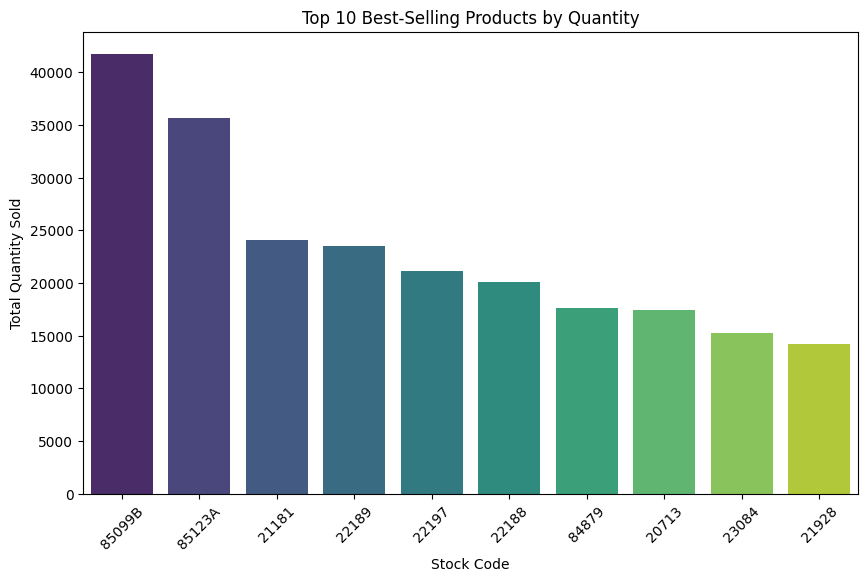

Top 10 Revenue-Generating Products:
            Revenue
StockCode          
85123A     89374.30
22423      84375.60
85099B     70974.92
21623      67339.94
48173C     65374.35
82484      63548.36
21523      63303.08
48188      57565.92
22189      56873.76
21955      53456.40
/tmp/ipykernel_41/2322431861.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_revenue.index, y=top_10_revenue['Revenue'], palette='coolwarm')


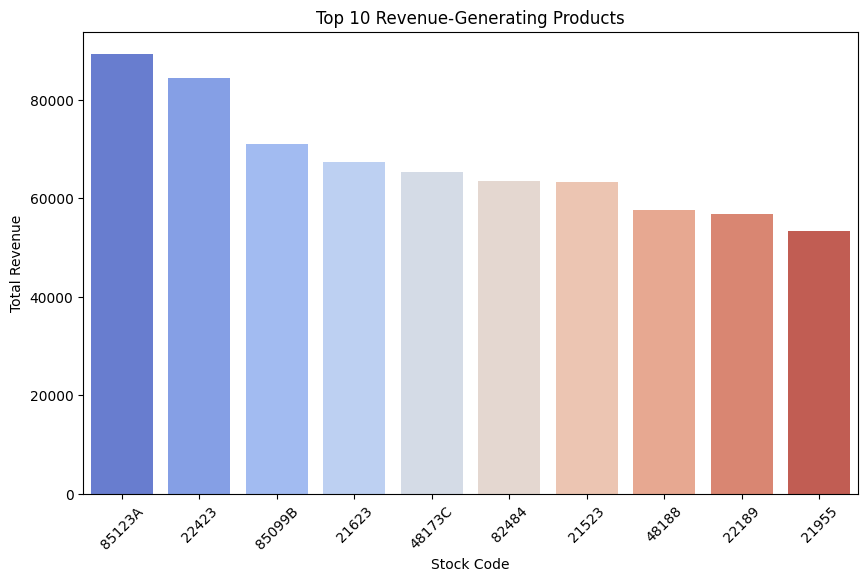

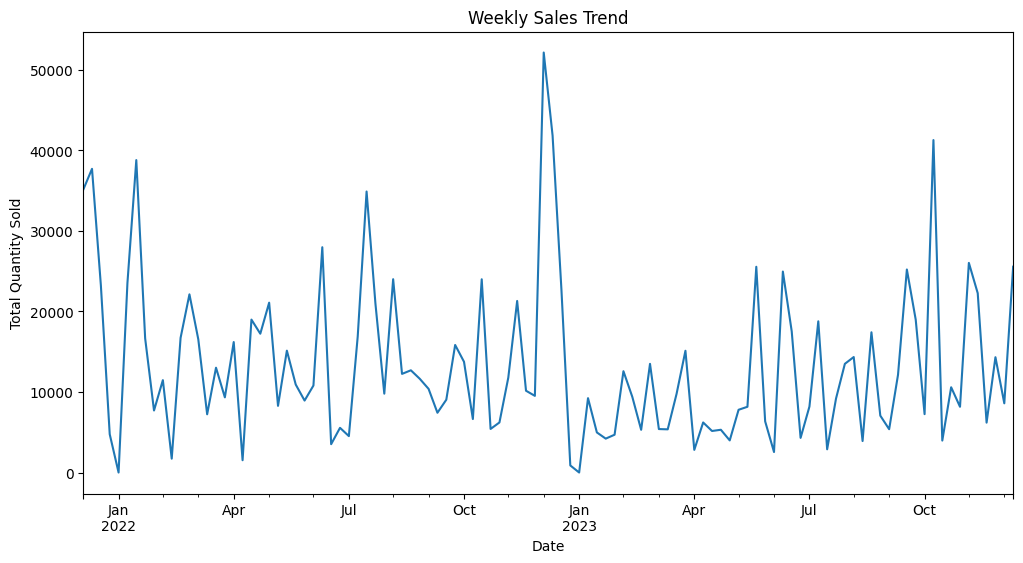

Customer Revenue by Country
                    Revenue
Country                    
United Kingdom  3295299.952
France            89721.830
Australia         26553.290
Belgium            9949.020
Netherlands        1570.610
USA                 282.000
/tmp/ipykernel_41/2322431861.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_revenue.index, y=customer_revenue['Revenue'], palette='Blues_d')


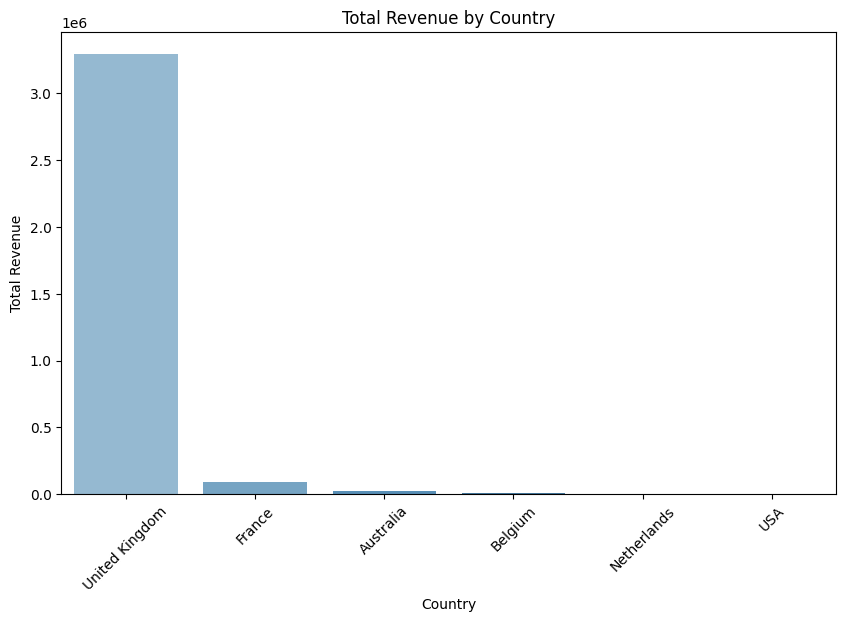

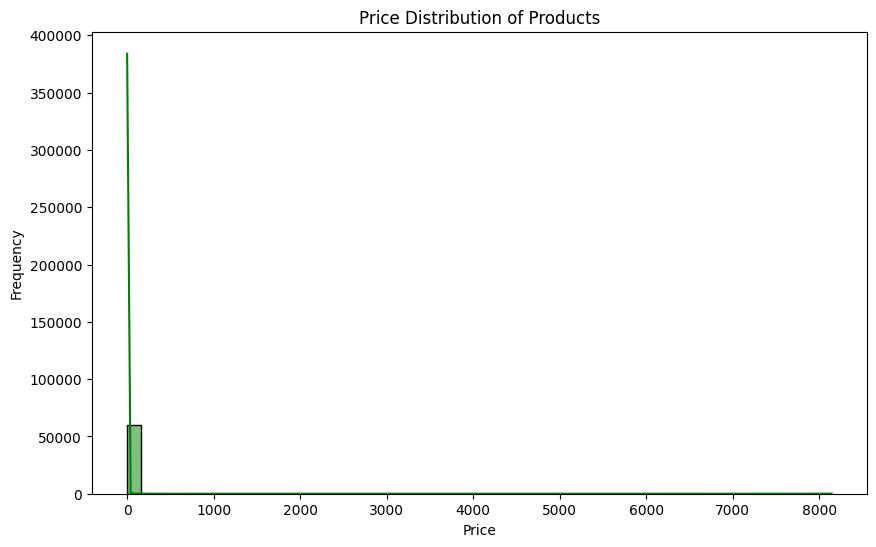

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Joined_Transactional_Customer_Product.csv')

# 1. Basic Summary Statistics
print("Basic Summary of Transactions")
print(df.describe())

print("Customer Country Distribution")
print(df['Country'].value_counts())

# 2. Top 10 Best-Selling Products by Quantity
top_10_quantity = df.groupby('StockCode').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False).head(10)
print("Top 10 Best-Selling Products by Quantity:")
print(top_10_quantity)

# Plot the Top 10 Best-Selling Products by Quantity
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_quantity.index, y=top_10_quantity['Quantity'], palette='viridis')
plt.title('Top 10 Best-Selling Products by Quantity')
plt.xlabel('Stock Code')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# 3. Top 10 Revenue-Generating Products
df['Revenue'] = df['Quantity'] * df['Price']
top_10_revenue = df.groupby('StockCode').agg({'Revenue': 'sum'}).sort_values(by='Revenue', ascending=False).head(10)
print("Top 10 Revenue-Generating Products:")
print(top_10_revenue)

# Plot the Top 10 Revenue-Generating Products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_revenue.index, y=top_10_revenue['Revenue'], palette='coolwarm')
plt.title('Top 10 Revenue-Generating Products')
plt.xlabel('Stock Code')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# 4. Time Series Analysis - Weekly Sales Trend
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)

# Resample data by week and calculate total sales
weekly_sales = df['Quantity'].resample('W').sum()

# Plot Weekly Sales Trend
plt.figure(figsize=(12, 6))
weekly_sales.plot()
plt.title('Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.show()

# 5. Customer Demographics Analysis
customer_revenue = df.groupby('Country').agg({'Revenue': 'sum'}).sort_values(by='Revenue', ascending=False)
print("Customer Revenue by Country")
print(customer_revenue)

# Plot Revenue by Country
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_revenue.index, y=customer_revenue['Revenue'], palette='Blues_d')
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# 6. Price Distribution for Products
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='green')
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [2]:
!pip install statsmodels==0.14.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 53.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 89.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-05 09:13:02.186226: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) t

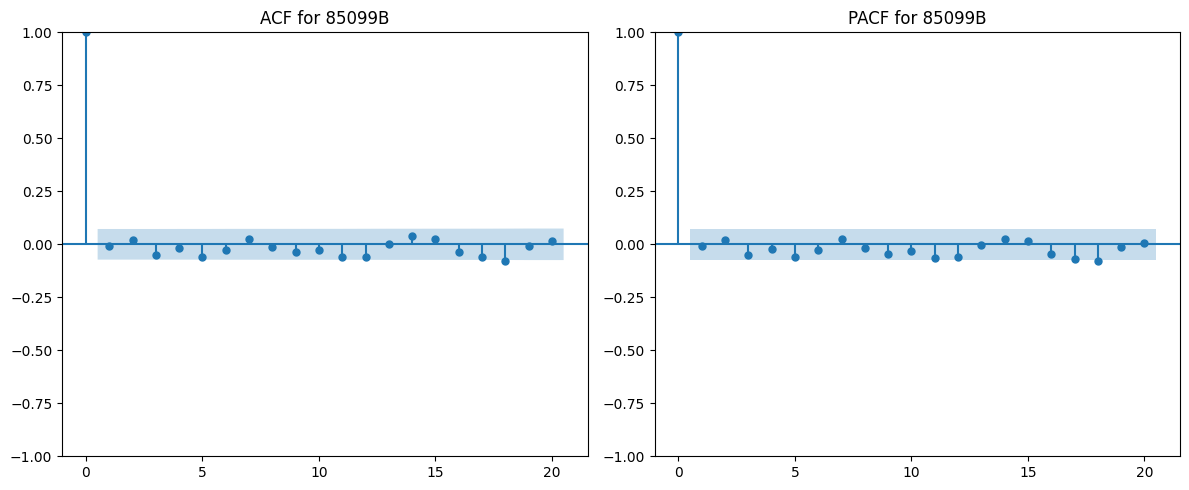

09:13:05 - cmdstanpy - INFO - Chain [1] start processing
09:13:05 - cmdstanpy - INFO - Chain [1] done processing
2024-10-05 09:13:05.546389: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-10-05 09:13:05.546423: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-10-05 09:13:05.546446: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-c2f0d11c-c0cc-4222-8090-cf79424055a2): /proc/driver/nvidia/version does not exist
2024-10-05 09:13:05.547236: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the

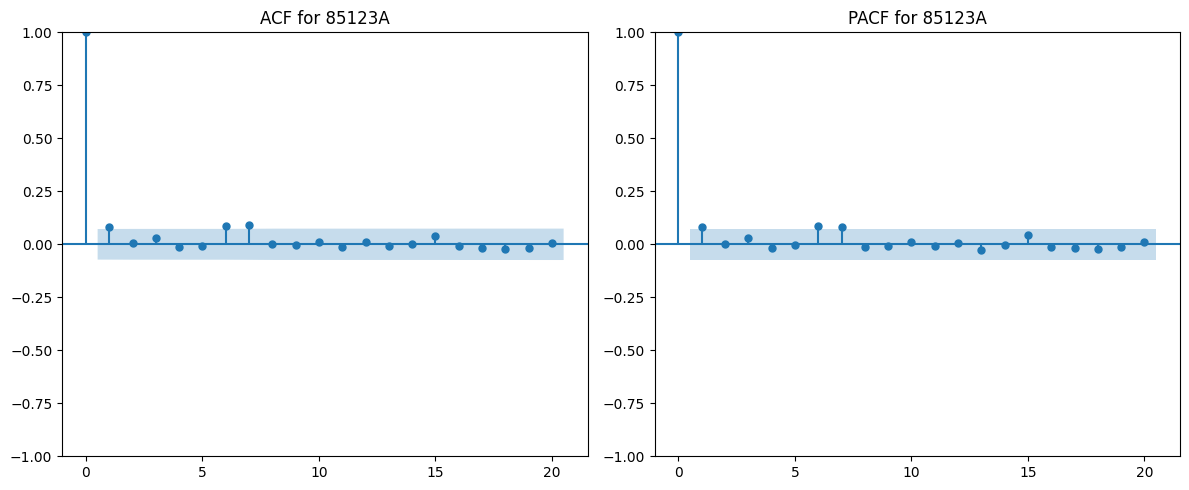

09:13:27 - cmdstanpy - INFO - Chain [1] start processing
09:13:27 - cmdstanpy - INFO - Chain [1] done processing
5/5 [==============================] - 0s 2ms/step


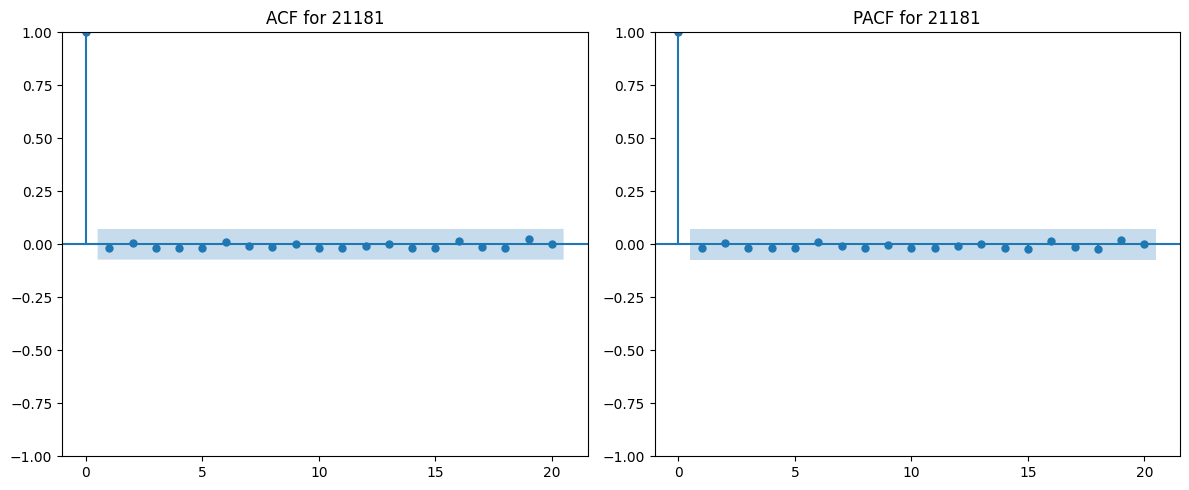

09:13:49 - cmdstanpy - INFO - Chain [1] start processing
09:13:49 - cmdstanpy - INFO - Chain [1] done processing
5/5 [==============================] - 0s 2ms/step


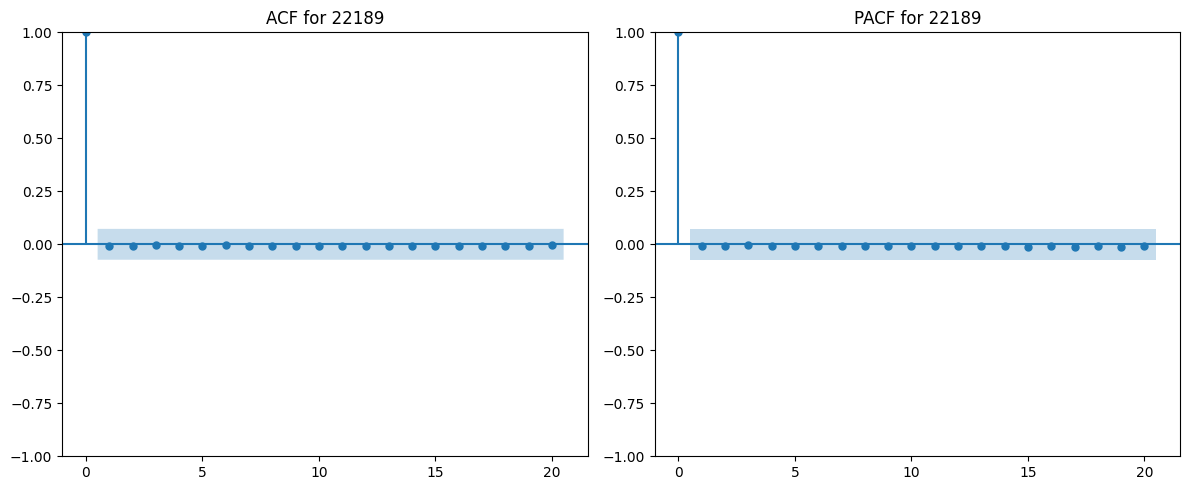

09:14:10 - cmdstanpy - INFO - Chain [1] start processing
09:14:10 - cmdstanpy - INFO - Chain [1] done processing
5/5 [==============================] - 0s 3ms/step


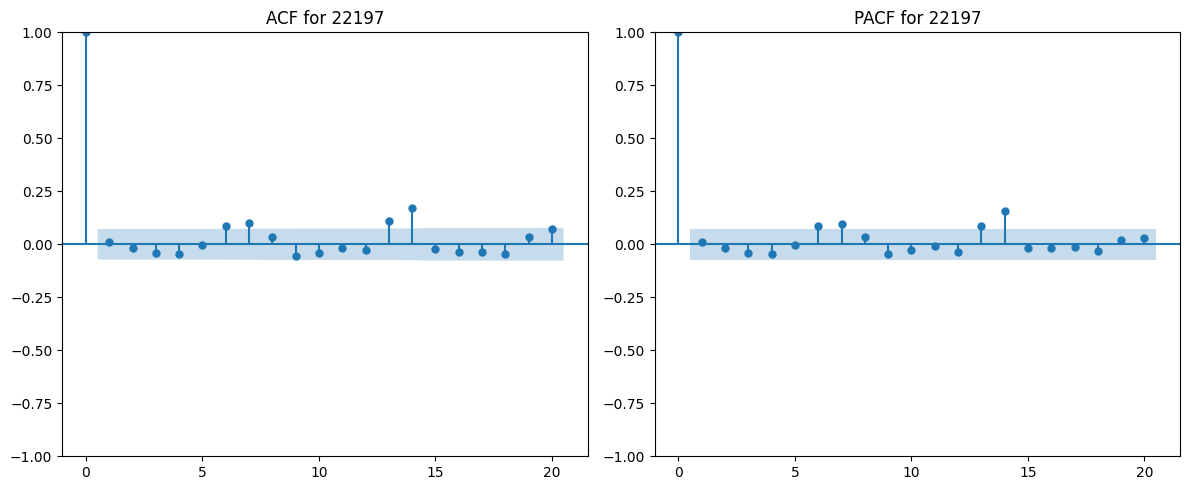

09:14:31 - cmdstanpy - INFO - Chain [1] start processing
09:14:31 - cmdstanpy - INFO - Chain [1] done processing
5/5 [==============================] - 0s 2ms/step


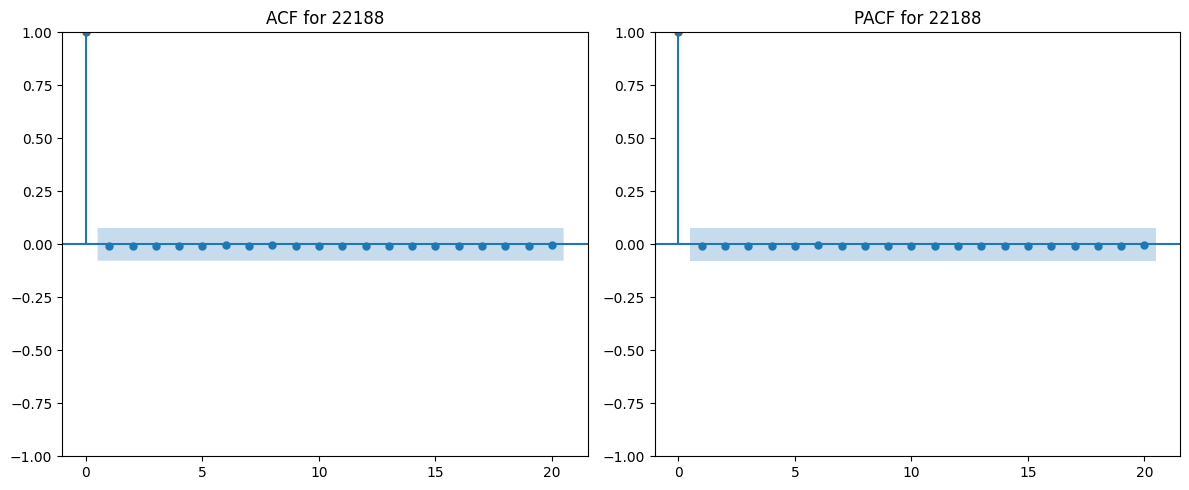

09:14:53 - cmdstanpy - INFO - Chain [1] start processing
09:14:53 - cmdstanpy - INFO - Chain [1] done processing
4/4 [==============================] - 0s 5ms/step


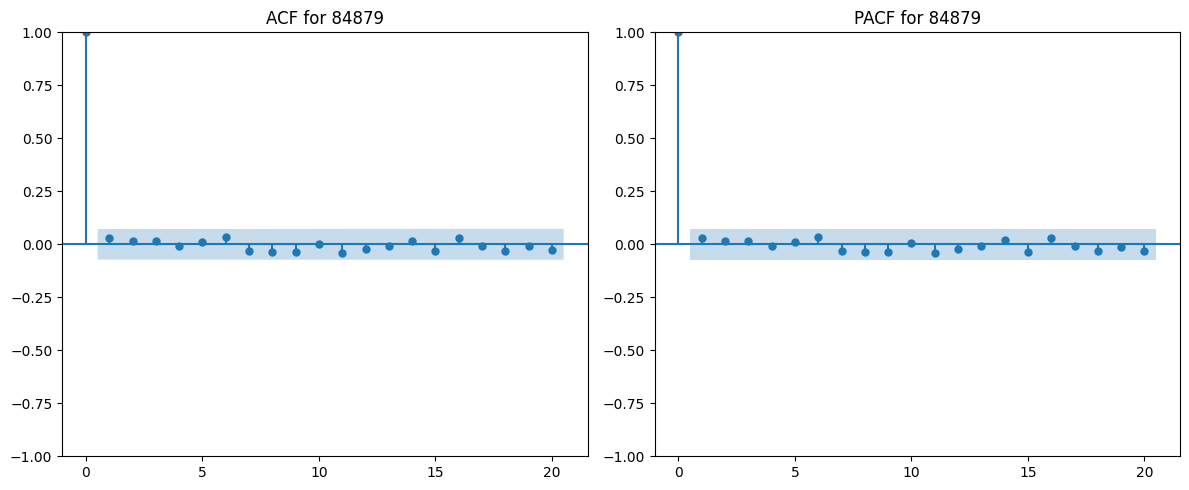

09:15:12 - cmdstanpy - INFO - Chain [1] start processing
09:15:12 - cmdstanpy - INFO - Chain [1] done processing
5/5 [==============================] - 0s 3ms/step


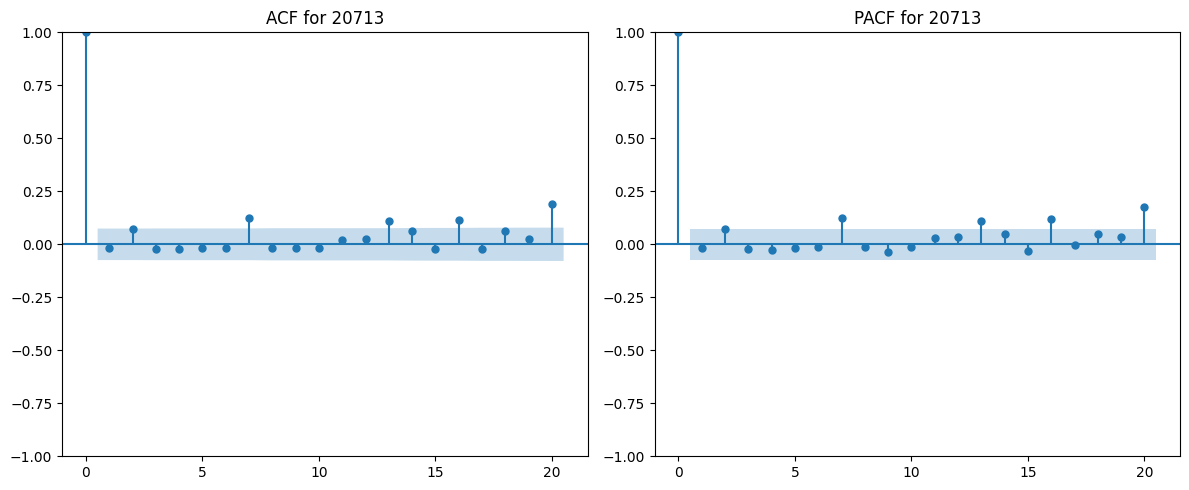

09:15:34 - cmdstanpy - INFO - Chain [1] start processing
09:15:34 - cmdstanpy - INFO - Chain [1] done processing
5/5 [==============================] - 0s 2ms/step


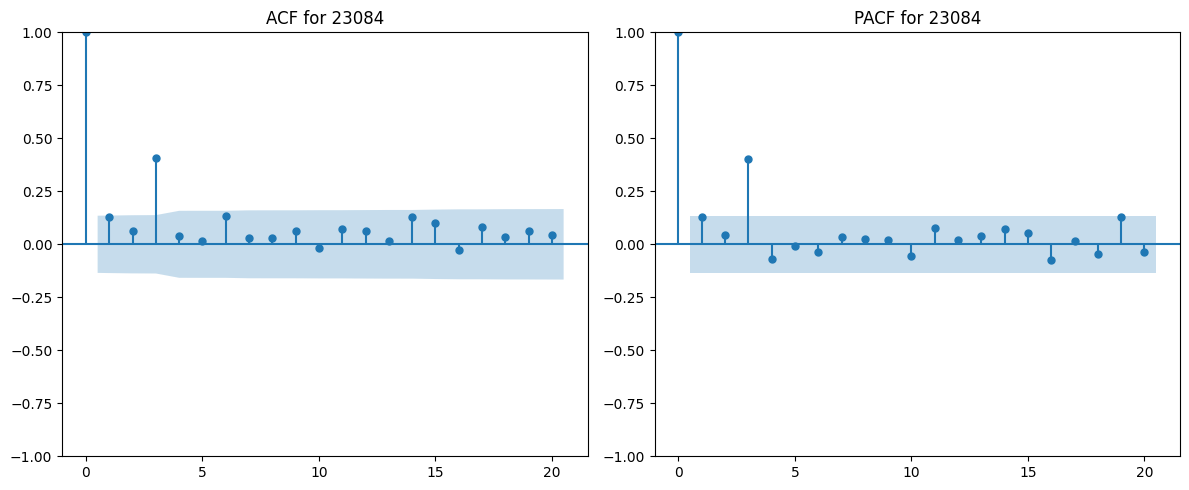

09:15:55 - cmdstanpy - INFO - Chain [1] start processing
09:15:55 - cmdstanpy - INFO - Chain [1] done processing
2/2 [==============================] - 0s 3ms/step


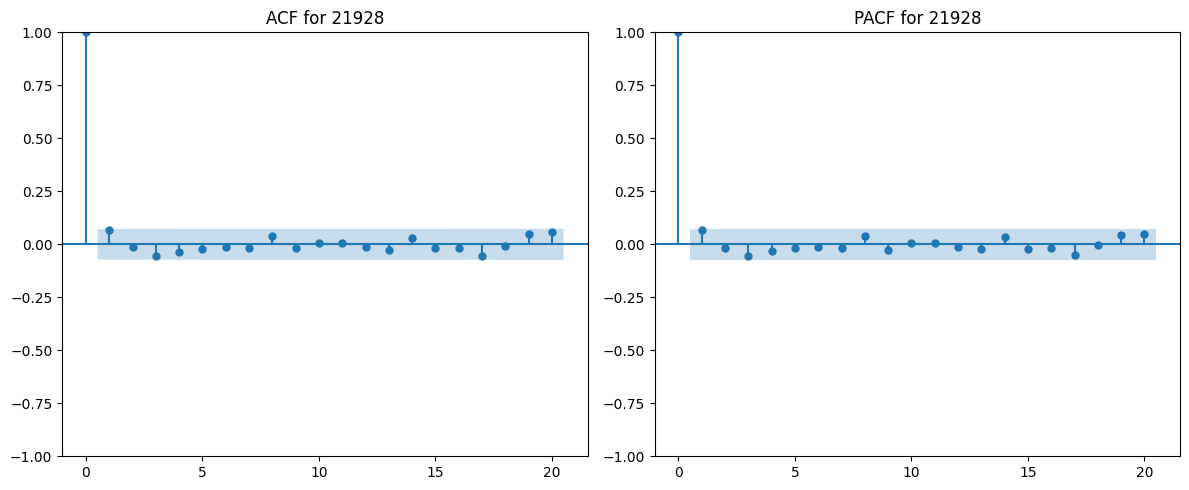

09:16:04 - cmdstanpy - INFO - Chain [1] start processing
09:16:04 - cmdstanpy - INFO - Chain [1] done processing
5/5 [==============================] - 0s 2ms/step
                                                    ARIMA  \
85099B  {'RMSE': 173.26063179647355, 'MAE': 94.2381622...   
85123A  {'RMSE': 57.480289828145146, 'MAE': 25.4507794...   
21181   {'RMSE': 217.0240186691625, 'MAE': 67.63026698...   
22189   {'RMSE': 110.96398138984922, 'MAE': 54.1205463...   
22197   {'RMSE': 194.51798233731213, 'MAE': 79.8008770...   
22188   {'RMSE': 91.60934523674669, 'MAE': 47.96109287...   
84879   {'RMSE': 122.87038075502153, 'MAE': 43.4210399...   
20713   {'RMSE': 302.6765535520251, 'MAE': 88.24877302...   
23084   {'RMSE': 566.2664348342288, 'MAE': 273.2759694...   
21928   {'RMSE': 56.30305722669374, 'MAE': 29.64955203...   

                                                      ETS  \
85099B  {'RMSE': 178.78174154435726, 'MAE': 101.517099...   
85123A  {'RMSE': 56.127062850948505, 'MAE'

<Figure size 1200x600 with 0 Axes>

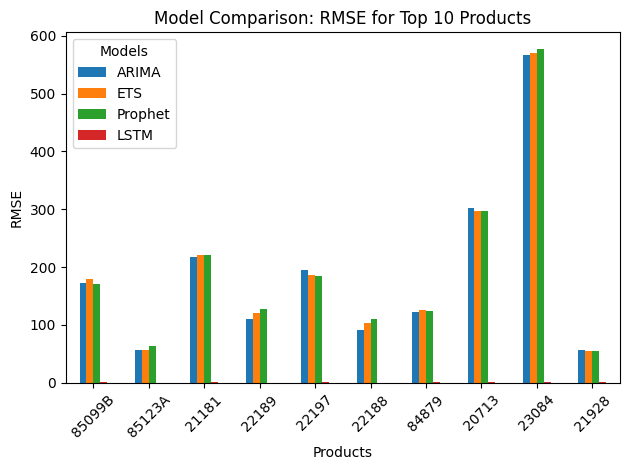

In [3]:
!pip install statsmodels
!pip install prophet
!pip install keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

warnings.filterwarnings("ignore")

# Load the data
df = pd.read_csv('Joined_Transactional_Customer_Product.csv')

# Calculate Revenue
df['Revenue'] = df['Quantity'] * df['Price']

# Get the top 10 products by quantity sold
top_products = df.groupby('StockCode').agg({'Quantity': 'sum'}).nlargest(10, 'Quantity').index.tolist()
top_products_df = df[df['StockCode'].isin(top_products)]

# Prepare the results DataFrame
results = {}

# Loop through each top product for time series analysis
for product in top_products:
    product_data = top_products_df[top_products_df['StockCode'] == product]
    
    # Aggregate daily sales
    daily_sales = product_data.groupby('InvoiceDate')['Quantity'].sum().reset_index()
    daily_sales['InvoiceDate'] = pd.to_datetime(daily_sales['InvoiceDate'])
    daily_sales.set_index('InvoiceDate', inplace=True)
    
    # Resample to daily frequency
    daily_sales = daily_sales.resample('D').sum().fillna(0)
    
    # Plot ACF and PACF
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plot_acf(daily_sales['Quantity'], lags=20, ax=plt.gca())
    plt.title(f'ACF for {product}')
    
    plt.subplot(1, 2, 2)
    plot_pacf(daily_sales['Quantity'], lags=20, ax=plt.gca())
    plt.title(f'PACF for {product}')
    
    plt.tight_layout()
    plt.show()

    # Splitting the data into training and testing sets (80/20 split)
    train_size = int(len(daily_sales) * 0.8)
    train, test = daily_sales[:train_size], daily_sales[train_size:]

    # Define forecasting horizon (number of steps ahead to forecast)
    forecasting_horizon = len(test)

    # 1. ARIMA Model
    try:
        arima_model = ARIMA(train['Quantity'], order=(1, 1, 1))
        arima_fit = arima_model.fit()
        arima_forecast = arima_fit.forecast(steps=forecasting_horizon)
        arima_rmse = np.sqrt(mean_squared_error(test['Quantity'], arima_forecast))
        arima_mae = mean_absolute_error(test['Quantity'], arima_forecast)
        results[product] = {'ARIMA': {'RMSE': arima_rmse, 'MAE': arima_mae}}
    except Exception as e:
        print(f"ARIMA failed for {product}: {e}")
    
    # 2. ETS Model
    try:
        ets_model = ExponentialSmoothing(train['Quantity'], seasonal='add', seasonal_periods=7)
        ets_fit = ets_model.fit()
        ets_forecast = ets_fit.forecast(steps=forecasting_horizon)
        ets_rmse = np.sqrt(mean_squared_error(test['Quantity'], ets_forecast))
        ets_mae = mean_absolute_error(test['Quantity'], ets_forecast)
        results[product]['ETS'] = {'RMSE': ets_rmse, 'MAE': ets_mae}
    except Exception as e:
        print(f"ETS failed for {product}: {e}")

    # 3. Prophet Model
    try:
        prophet_data = daily_sales.reset_index().rename(columns={'InvoiceDate': 'ds', 'Quantity': 'y'})
        prophet_model = Prophet()
        prophet_model.fit(prophet_data[:train_size])
        future = prophet_model.make_future_dataframe(periods=forecasting_horizon)
        prophet_forecast = prophet_model.predict(future)['yhat'][-forecasting_horizon:]
        prophet_rmse = np.sqrt(mean_squared_error(test['Quantity'], prophet_forecast))
        prophet_mae = mean_absolute_error(test['Quantity'], prophet_forecast)
        results[product]['Prophet'] = {'RMSE': prophet_rmse, 'MAE': prophet_mae}
    except Exception as e:
        print(f"Prophet failed for {product}: {e}")

    # 4. LSTM Model
    try:
        # Prepare LSTM input
        data = daily_sales['Quantity'].values.reshape(-1, 1)
        data = (data - np.mean(data)) / np.std(data)  # Normalize the data
        
        # Create sequences
        X, y = [], []
        for i in range(len(data) - 7):
            X.append(data[i:i + 7])
            y.append(data[i + 7])
        X, y = np.array(X), np.array(y)
        
        # Split the data
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        
        # Reshape input to be [samples, time steps, features]
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
        
        # Build the LSTM model
        lstm_model = Sequential()
        lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
        lstm_model.add(Dense(1))
        lstm_model.compile(optimizer='adam', loss='mse')
        
        # Fit the model
        lstm_model.fit(X_train, y_train, epochs=200, verbose=0)
        
        # Make predictions
        lstm_forecast = lstm_model.predict(X_test)
        lstm_forecast = lstm_forecast * np.std(data) + np.mean(data)  # Rescale back
        
        lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_forecast))
        lstm_mae = mean_absolute_error(y_test, lstm_forecast)
        results[product]['LSTM'] = {'RMSE': lstm_rmse, 'MAE': lstm_mae}
    except Exception as e:
        print(f"LSTM failed for {product}: {e}")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Display the results
print(results_df)

# Create a DataFrame for RMSE values
rmse_df = pd.DataFrame({
    'ARIMA': results_df['ARIMA'].apply(lambda x: x['RMSE']),
    'ETS': results_df['ETS'].apply(lambda x: x['RMSE']),
    'Prophet': results_df['Prophet'].apply(lambda x: x['RMSE']),
    'LSTM': results_df['LSTM'].apply(lambda x: x['RMSE']),
})

# Plot Results
plt.figure(figsize=(12, 6))
rmse_df.plot(kind='bar')
plt.title('Model Comparison: RMSE for Top 10 Products')
plt.ylabel('RMSE')
plt.xlabel('Products')
plt.xticks(rotation=45)
plt.legend(title='Models')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [4]:
# Installing the xgboost library
!pip install xgboost

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import joblib

# Load your data
df = pd.read_csv('Joined_Transactional_Customer_Product.csv')

# Data Preparation
customer_product_df = df.groupby(['CustomerID', 'StockCode']).agg({
    'Quantity': 'sum'
}).reset_index()

# Mock demographics features
customer_product_df['AgeGroup'] = np.random.choice(['18-25', '26-35', '36-45', '46-60', '60+'], size=len(customer_product_df))
customer_product_df['TotalSpending'] = np.random.uniform(50, 500, size=len(customer_product_df))

# Feature encoding
X = customer_product_df.drop(columns='Quantity')
y = customer_product_df['Quantity']
X = pd.get_dummies(X, columns=['StockCode', 'AgeGroup'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training Function
def train_models(X_train, y_train):
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
        'Decision Tree': DecisionTreeRegressor(random_state=42)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        results[name] = model
    return results

# Train models
models = train_models(X_train, y_train)

# Evaluate Models
results_eval = {}
for name, model in models.items():
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    
    # Store results
    results_eval[name] = {'RMSE': rmse, 'MAE': mae}

# Convert evaluation results to DataFrame
results_eval_df = pd.DataFrame(results_eval).T

# Display the evaluation results
print("Model Evaluation Results:")
print(results_eval_df)

# Save models if needed for later use
for name, model in models.items():
    joblib.dump(model, f'{name}.joblib')


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Model Evaluation Results:
                     RMSE         MAE
Random Forest  828.535442  175.823370
XGBoost        814.214038  200.625365
Decision Tree  894.634017  188.353687


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2f0d11c-c0cc-4222-8090-cf79424055a2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>